NLP Analysis on Role Descriptions for data related roles. The idea is to identify most required skills (single keywords), or responsibilities (string of keywords) for roles like Data Analyst, Data Scientist or Machine Learning Engineer.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

### Uploading datasets for the 3 roles 

In [281]:
with open('Data_Analyst.txt', 'r', encoding='utf8') as file:
    da_data = file.read().replace('\n',' . ')
len(da_data)

23315

In [282]:
with open('Data_Scientist.txt', 'r', encoding='utf8') as file:
    ds_data = file.read().replace('\n',' . ')
len(ds_data)

25031

In [283]:
with open('Machine_Learning_Engineer.txt', 'r', encoding='utf8') as file:
    ml_data = file.read().replace('\n',' . ')
len(ml_data)

24481

### Removing symbols and punctuations from the data

In [24]:
def data_cleaner(doc):
    symbols = '!"#$%&()*+-/:;<=>?@^_`{|}~'
    for i in symbols:
        doc = doc.replace(i," ")
    content = [word.lower() for word in doc.split()]
    return " ".join(content)

In [25]:
da_data = data_cleaner(da_data)
ds_data = data_cleaner(ds_data)
ml_data = data_cleaner(ml_data)

### Stopwords

Stopwords are the most common words in any language (like articles, prepositions, pronouns, conjunctions, etc). These words won't add much information to our data and can be removed. I'm using the <b>spacy</b> and <b>gensim</b> libraries to remove the stopwords. I'll later remove some custom stopwords which are generic to all three of the data-related roles.

<b> NOTE</b> : It's not always a good practice to remove stopwords. This should be done based on the task at hand. For example, when doing sentiment analysis, removing stopwords can completely change the sentiment of the statement. If the statement is "I'm not liking the product", then by the virtue of 'not' being a stopword in most of the nlp libraries, after stopwords removal the statement would become "I'm liking product". That's bad!

In [27]:
import spacy
english_stop_words = spacy.load('en_core_web_sm')
stopwords = english_stop_words.Defaults.stop_words

In [28]:
type(stopwords)

set

In [29]:
import gensim
from gensim.parsing.preprocessing import STOPWORDS
sw = set(STOPWORDS)

In [30]:
stopwords.update(sw)

In [31]:
def stopword_remover(doc, Stopwords):
    content = [word for word in doc.split() if word not in Stopwords]
    return " ".join(content)

In [32]:
da_no_sw = stopword_remover(da_data, stopwords)
ds_no_sw = stopword_remover(ds_data, stopwords)
ml_no_sw = stopword_remover(ml_data, stopwords)

In [285]:
print(len(da_data), len(ds_data), len(ml_data))
print(len(da_no_sw), len(ds_no_sw), len(ml_no_sw))

23315 25031 24481
17692 19682 18797


From each of the 3 initial datasets we've removed around 5500 words/characters that were generic english stopwords or symbols.

### Term-Frequency (TF)

We still have words like "technology", "skills", "knowledge", "tools" in our dataset which don't point to any particular role.
NLP often requires removal of custom stopwords specific to the domain which the dataset belongs to. I'll be using the Term Frequency of words in the dataset, to further identify words that are occuring frequently, but are not very relevant in determing either od the 3 roles. <b>Term frequency</b> is the measurement of how frequently a term occurs within a document. One way of finding term frequency is finding the ratio of number of times the word occured, to the total number of words in the document. 

In [286]:
# Making a set of all words -

all_data = da_no_sw + ds_no_sw + ml_no_sw
words_set = set()
words = all_data.split(' ')
words.remove('.')
words_set = words_set.union(set(words))

In [287]:
# Computing Term Frequency(TF) -

n_words_set = len(words_set) #·Number of unique words
df_tf = pd.DataFrame(np.zeros((1, n_words_set)), columns=words_set)

for w in words:
    df_tf[w] = df_tf[w] + (1 / len(words))
        
df_tf

,perform,server,alongside,hierarchical,metrics,relationships,0,complex,"spss,",schedule,...,source,performance,depth,"development,","mandate.,","recommendations,",behavior,"redis,",lookalike,familiar
0,0.000804,0.000134,0.000134,0.000134,0.001072,0.000536,0.000134,0.001205,0.000134,0.000268,...,0.000536,0.001607,0.000402,0.000268,0.000134,0.000134,0.000134,0.000134,0.000134,0.000402


In [58]:
df_tf.drop('.', inplace=True, axis=1)
dft = df_tf.T
dft.columns = ['word_frequency']
dft = dft.sort_values(by = 'word_frequency', ascending=False)

In [60]:
pd.set_option('display.max_rows',2200)
dft

,word_frequency
data,0.034155
experience,0.017278
•,0.008974
work,0.007635
ml,0.007635
business,0.007233
learning,0.005224
years,0.005090
machine,0.005090
team,0.004822


In [61]:
dft.reset_index(inplace=True)

In [62]:
for i in dft['index']:
    print(f"'{i}'",end=",")

'data','experience','•','work','ml','business','learning','years','machine','team','tools','ability','analysis','strong','teams','knowledge','models','skills','working','science','develop','product','python','support','understanding','analytics','solutions','etc.','new','degree','qualifications','statistical','large','software','including','systems','responsibilities','preferred','science,','field','communication','development','identify','build','design','related','relevant','cloud','analytical','create','programming','role','end','deep','sql','model','use','management','stakeholders','engineering,','algorithms','technical','statistics,','cross','provide','research','methods','time','testing','advanced','like','analysis,','modeling','learn','datasets','quality','impact','drive','results','learning,','building','r','collaborate','engineering','projects','functional','big','help','requirements','analyze','processes','environment','best','code',',','python,','performance','problems','pro

'pipelines,','segmentation','clusters','gathering','formulate','variables','hyperion,','prevent,','crucial','cleanse,','solver','filter','role,','app,','quantitatively','rapid','clustering,','employ','goals.','achieve','designs,','d','shorten','yield.','canon','pilot','roadblocks','infrastructure,','mentors,','remaining','files','maximum','2022','20','computation','expect','pursing','touches','bleeding','ba','appreciates','delivering','representing','ample','ci','merchandising,','talented','planning,','scalability','inspire','meta’s','analysts.','scoring','principal','susceptibility','written,','efficiently','roles',

Words at the top are the most frequent. Words like work, tools, ability, knowledge, working are generic and won't contribute much in analysing the data or building a model. But words like data, ml, analysis are crucial to our data. So I'll manually make a set of some words from the top of this 'dft' column and remove them using my stopword_remover function. I'll also add the names of the companies offering the roles because that is also not required.

In [293]:
more_stop_words = {'•','work','tools','hiring', 'ability','teams','skills','strong', 'intern', 'msc', 'knowledge','working','product','systems','g','e','support','preferred','understanding','solutions','qualifications','large','new','responsibilities','degree','including','identify','related','relevant','create','role','end','methods','problems','technical','use','results','impact','like','required','time','provide','performance','learn','sources','drive','quality','building','help','processes','requirements','best','projects','improve','techniques','da','excellent','project','effective','ensure','people','3','practices','5','information','familiarity','problem','multiple','high','key','existing','proficiency','complex','define','partners','you’ll','tasks','apply','packages','computing','ds','following','maintain','findings','qlik', '2','highly','interpret','understand','continuous','skills,','platforms','clearly','oriented','good','growth','need','deliver','different','written','closely','way','systems,','feedback','minimum','non','successful','conduct','solving','real','fast','questions','job','trends','users','perform','basic','needs','solve','internal','based','able','opportunities','responsible','4','1','methods', 'technologies', 'engineering', 'you', 'research', 'software', 'develop','programming','training','implement', 'internship', 'programs', 'pma', 'systemart', 'canon', 'vodori', 'pilot', 'loréal', 'disney', 'hsbc', 'ubs', 'meta', 'acretrader', 'walmart', 'microsoft', 'yahoo', 'ad', 'astra', 'stripe', 'cisco', 'growsquares', 'capital',  'synechron', 'bastian', 'soluitons', 'samsung', 'america', 'eversight', 'bluevine', 'wework', 'overstock', 'beacons', 'qualcomm', 'fieldcore', 'hellofresh'}

In [294]:
da_no_sw_2 = stopword_remover(da_no_sw, more_stop_words)
ds_no_sw_2 = stopword_remover(ds_no_sw, more_stop_words)
ml_no_sw_2 = stopword_remover(ml_no_sw, more_stop_words)

In [295]:
print(len(da_no_sw), len(ds_no_sw), len(ml_no_sw))
print(len(da_no_sw_2), len(ds_no_sw_2), len(ml_no_sw_2))

17692 19682 18797
13361 15276 14545


### TF-IDF 

TF-IDF stands for term frequency-inverse document frequency and it is a measure, used in the fields of information retrieval (IR) and machine learning, that can quantify the importance or relevance of string representations (words, phrases, lemmas, etc) in a document amongst a collection of documents (also known as a corpus).

I'll perform TF-IDF Vectorization just to take a look at the 50 most important/relevant words in the combined three documents.

In [296]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform([ml_no_sw_2])
df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)

In [297]:
df.head(50)

,TF-IDF
experience,0.455382
ml,0.447531
data,0.353314
learning,0.251245
machine,0.180582
models,0.180582
years,0.141325
python,0.133474
design,0.125623
team,0.117771


Based on TF-IDF analysis, it can be seen that apart from words like data, ml, experience the top 50 words includes skill-indicative words likes <b>python, cloud, pipelines, tensorflow, pandas, scikit, aws, spark, numpy, keras, statistics </b>.


Let's take a look at more elaborate strings using a library called <b>keyBERT</b>, which is a keyword extraction package that leverages BERT embeddings to create keywords and keyphrases that are most similar to a document.

In [298]:
from keybert import KeyBERT

kw_model = KeyBERT()
kw_ml = kw_model.extract_keywords(ml_no_sw_2, top_n=10, keyphrase_ngram_range=(3, 3), stop_words=None)
kw_ml

[('frameworks ml ecosystem', 0.5958),
 ('ml testing infrastructure', 0.5919),
 ('ml technologies aws', 0.5808),
 ('deployment ml models', 0.5547),
 ('developing deploying ml', 0.5434),
 ('developing ml applications', 0.541),
 ('latest frameworks ml', 0.5404),
 ('deploying ml models', 0.5404),
 ('experience developing ml', 0.5349),
 ('machine learning engineer', 0.5259)]

For ML duties, we can see an emphasis on frameworks, deployment, aws. One can further refine these using other attributes like Max Sum Similarity to diversify the results. Let's take a look at top keyword strings for data analyst and data scientist roles.

In [299]:
kw_da = kw_model.extract_keywords(da_no_sw_2, top_n=10, keyphrase_ngram_range=(1, 3), stop_words=None)
kw_da

[('experience data analyst', 0.5839),
 ('data analysis experience', 0.5728),
 ('data analyst requirement', 0.5493),
 ('experience developing data', 0.5463),
 ('excel experience', 0.5376),
 ('data analysis business', 0.534),
 ('sql experience', 0.5334),
 ('workflow experience analytical', 0.5333),
 ('experience writing sql', 0.5283),
 ('analysis experience', 0.5281)]

In [72]:
kw_ds = kw_model.extract_keywords(ds_no_sw_2, top_n=10, keyphrase_ngram_range=(1, 3), stop_words=None)
kw_ds

[('data analytics team', 0.6009),
 ('analytics machine', 0.59),
 ('analytics machine learning', 0.5898),
 ('performing predictive analytics', 0.5824),
 ('oversee data analytics', 0.5631),
 ('data analytics experience', 0.5567),
 ('analytics tools', 0.5396),
 ('analytics data science', 0.5378),
 ('analytics experience versed', 0.5334),
 ('analytics experience', 0.5334)]

### Lemmatization

Lemmatisation is the process of grouping together the inflected forms of a word so they can be analysed as a single item. So 'developer' and 'developers' will become the same term.

In [74]:
import nltk
from nltk.stem import WordNetLemmatizer 

def custom_lemmatizer(data):
    lemmatizer = WordNetLemmatizer()
    lemma_list = nltk.word_tokenize(data)
    lemmatized_data = ' '.join([lemmatizer.lemmatize(w) for w in lemma_list])
    return lemmatized_data

In [305]:
ml_data = custom_lemmatizer(ml_no_sw_2)
ds_data = custom_lemmatizer(ds_no_sw_2)
da_data = custom_lemmatizer(da_no_sw_2)

### Visualizing Keywords

In [309]:
# Single Keywords -
keywords_da = kw_model.extract_keywords(da_data, top_n=200, keyphrase_ngram_range=(1, 1), stop_words=None)
keywords_ds = kw_model.extract_keywords(ds_data, top_n=200, keyphrase_ngram_range=(1, 1), stop_words=None)
keywords_ml = kw_model.extract_keywords(ml_data, top_n=200, keyphrase_ngram_range=(1, 1), stop_words=None)
print("Top 50 ML Keywords -")
keywords_ml[:50]

Top 50 ML Keywords -


[('mle', 0.368),
 ('agile', 0.3542),
 ('mlops', 0.3468),
 ('developer', 0.3199),
 ('devops', 0.3168),
 ('scala', 0.3124),
 ('tensorflow', 0.3054),
 ('ai', 0.305),
 ('engineering', 0.2958),
 ('ml', 0.2953),
 ('cloud', 0.2865),
 ('aws', 0.2763),
 ('microservices', 0.2747),
 ('lambda', 0.272),
 ('expertise', 0.2716),
 ('automation', 0.2693),
 ('pipeline', 0.2648),
 ('mentor', 0.2645),
 ('training', 0.2643),
 ('architecting', 0.2625),
 ('engineer', 0.2581),
 ('pipelines', 0.2562),
 ('mentorship', 0.2557),
 ('hadoop', 0.255),
 ('developing', 0.2484),
 ('development', 0.2443),
 ('analytics', 0.2435),
 ('azure', 0.2406),
 ('workflow', 0.24),
 ('scalable', 0.2385),
 ('python', 0.2358),
 ('java', 0.2343),
 ('databricks', 0.2339),
 ('codebase', 0.2331),
 ('collaborating', 0.2305),
 ('datasets', 0.2294),
 ('cluster', 0.2206),
 ('infrastructure', 0.2194),
 ('tool', 0.2186),
 ('experience', 0.2129),
 ('apis', 0.2119),
 ('skill', 0.2101),
 ('framework', 0.2083),
 ('statsmodels', 0.2073),
 ('mining',

In [77]:
from wordcloud import WordCloud

def wordClouder(keywords):
    w = WordCloud(width=1200, height=1000, mode='RGBA', background_color='white', max_words=100,
             max_font_size=100).fit_words(dict(keywords))
    plt.figure(figsize=(20,15))
    plt.imshow(w)
    plt.axis('off')

## Data Analytics Keywords - 

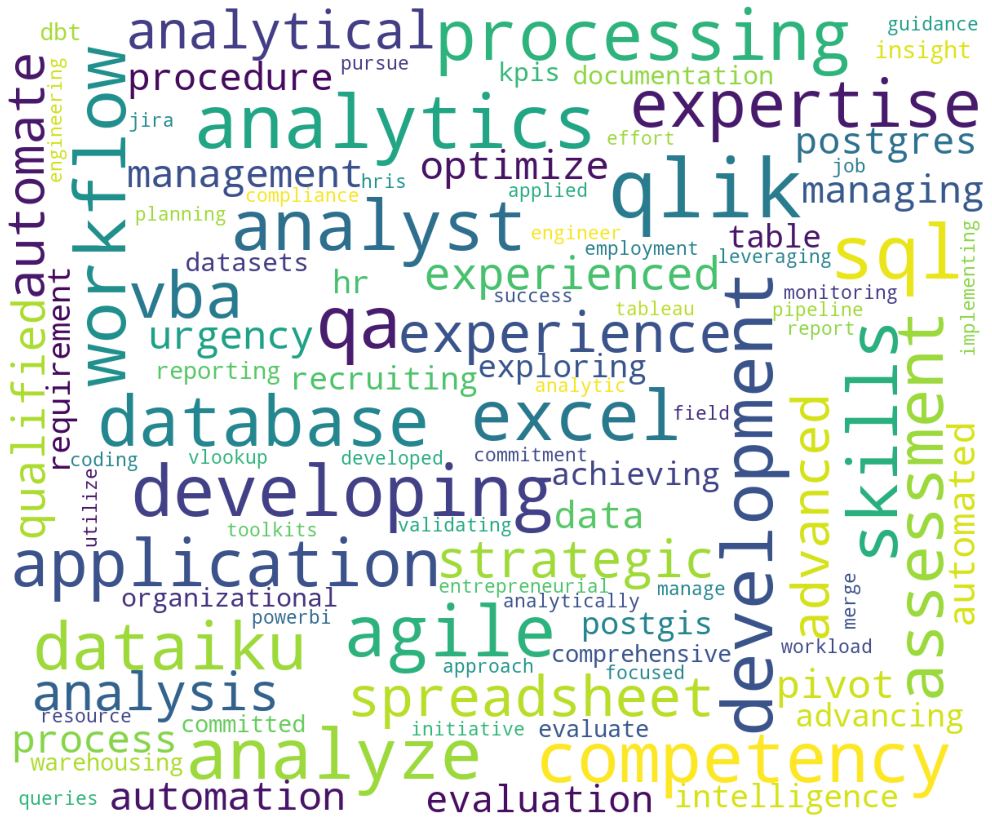

In [78]:
wordClouder(keywords_da)

## Data Science Keywords - 

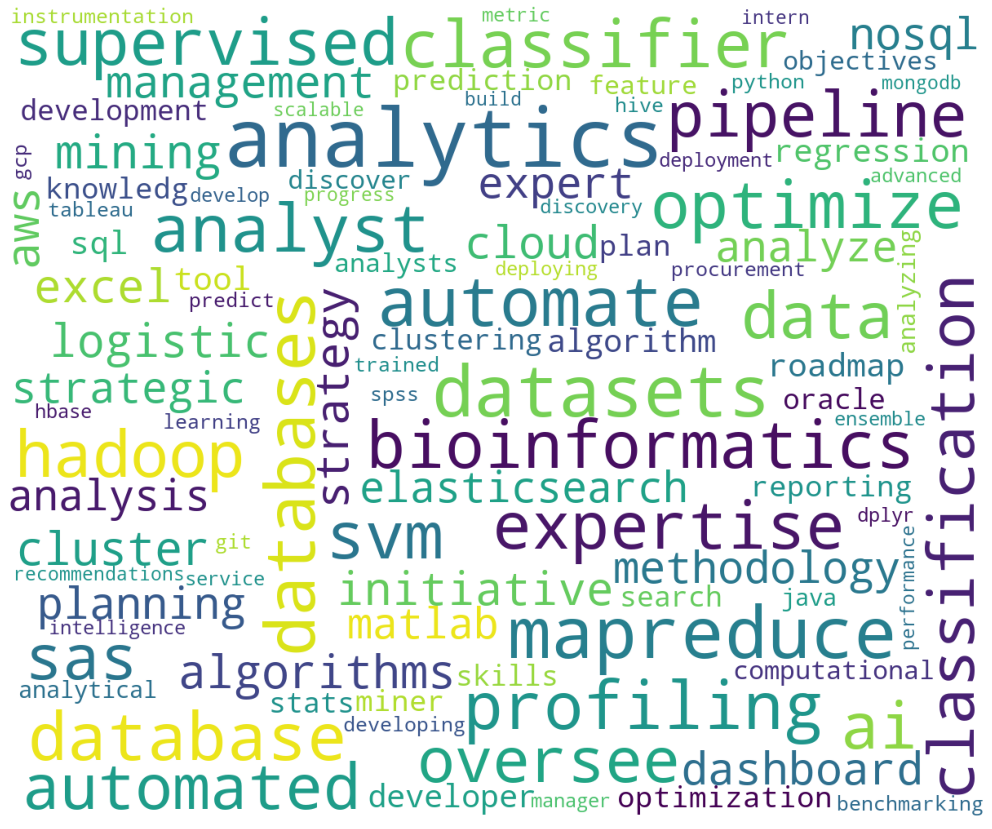

In [81]:
wordClouder(keywords_ds)

## Machine Learning Keywords - 

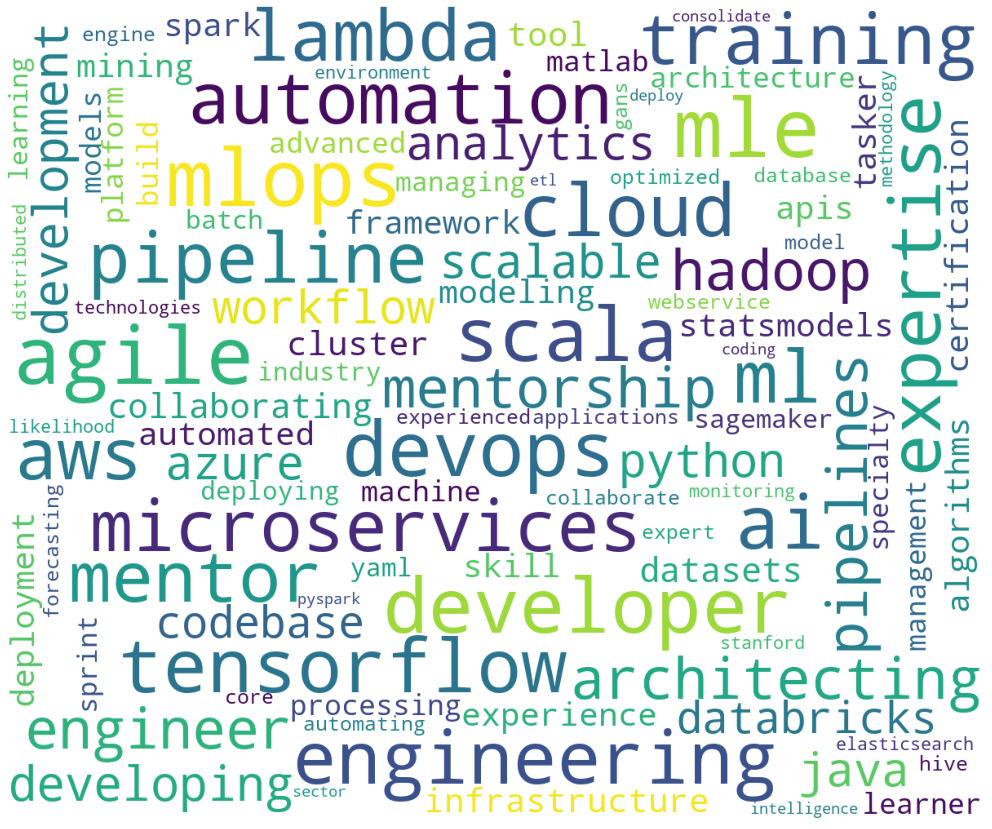

In [82]:
wordClouder(keywords_ml)

### Machine Learning Model to predict the roles based on particular skills


After having taken insights from the data, let's see if we can make a model that takes in the skills from a user and suggests a data role out of the three based on our above preprocessed data. I have often seen people being confused regarding the skills and relevant roles in the data-driven roles so it would be interesting to see if the model, based on the available 30+ job descriptions, also indicate the percentage appropriateness of role, given a skill or multiple skills.

In [167]:
def len_filter(s):
    return len(s) > 5

def dataframe_creator(data, role):
    data_list = data.split(".")
    data_list = [i.strip() for i in filter(len_filter,data_list)]
    df = pd.DataFrame(data=data_list, columns=['Role_Description'])
    df['Role'] = role
    return df

In [168]:
ds_dataset = dataframe_creator(ds_data, 'Data Scientist')
da_dataset = dataframe_creator(da_data, 'Data Analyst')
ml_dataset = dataframe_creator(ml_data, 'Machine Learning')

In [169]:
datasets = [ds_dataset,da_dataset, ml_dataset]
data_combined = pd.concat(datasets)
data_combined = data_combined.reset_index(drop=True)
data_combined

,Role_Description,Role
0,strategy planning,Data Scientist
1,"cross departmental team metric , guideline , s...",Data Scientist
2,"identify , design , build appropriate datasets...",Data Scientist
3,"data mining analytics architecture , coding st...",Data Scientist
4,"establish link data new , interesting mash ups",Data Scientist
5,"coordinate data resource analytics , applicati...",Data Scientist
6,"manager , engineer , analytics team member tra...",Data Scientist
7,assist development data management policy proc...,Data Scientist
8,analytics instrumentation experimentation,Data Scientist
9,acquisition deployment,Data Scientist


In [205]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_combined['Role_Description'], data_combined['Role'], random_state=10)

In [206]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(strip_accents='ascii', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b', lowercase=True, stop_words='english')
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [207]:
# Multinomial Naive Bayes Model -

from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_cv, y_train)
predictions = naive_bayes.predict(X_test_cv)

In [208]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
print('Accuracy score: ', accuracy_score(y_test, predictions))
print('Precision score: ', precision_score(y_test, predictions, average='weighted'))
print('Recall score: ', recall_score(y_test, predictions, average='weighted'))
print('Confusion Matrix:\n', confusion_matrix(y_test,predictions))

Accuracy score:  0.6166666666666667
Precision score:  0.6110323089046493
Recall score:  0.6166666666666667
Confusion Matrix:
 [[36 12 13]
 [20 27 11]
 [ 5  8 48]]


In [222]:
# Logistic Regression Model - 

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_cv, y_train)
predictions_lr = lr.predict(X_test_cv)

In [223]:
print('Accuracy score: ', accuracy_score(y_test, predictions_lr))
print('Precision score: ', precision_score(y_test, predictions_lr, average='weighted'))
print('Recall score: ', recall_score(y_test, predictions_lr, average='weighted'))
print('Confusion Matrix:\n', confusion_matrix(y_test,predictions_lr))

Accuracy score:  0.6277777777777778
Precision score:  0.6236137169063999
Recall score:  0.6277777777777778
Confusion Matrix:
 [[37 10 14]
 [20 25 13]
 [ 4  6 51]]


Now let's test our model based on just the skills input.
Note that for all the three roles, the above test set doesn't just contain the skills but all other information around the role, which in this case, is very similar for the 3 classes of data related roles. Naturally, the classes being very similar in duties and in language, a high accuracy wasn't achieved. 

Let's test the model on particular inputs.

In [318]:
skills = ["tensorflow", "mapreduce", "tableau", "sql"]
for skill in skills:
    user_input = cv.transform([skill]).toarray()
    print(skill,'-',naive_bayes.predict(user_input)[0]) 
    print('Prediction probability for classes - DA, DS, ML:',naive_bayes.predict_proba(user_input)[0])

tensorflow - Machine Learning
Prediction probability for classes - DA, DS, ML: [0.0899284  0.08777876 0.82229284]
mapreduce - Data Scientist
Prediction probability for classes - DA, DS, ML: [0.24418983 0.47670544 0.27910474]
tableau - Data Analyst
Prediction probability for classes - DA, DS, ML: [0.54123347 0.21131834 0.24744819]
sql - Data Analyst
Prediction probability for classes - DA, DS, ML: [0.44471421 0.38585224 0.16943355]


The model seems to work well on estimating roles by skills. Let's create a output function to neatly arrange our output and also take care of 

In [255]:
def output(skills):
    data = cv.transform([skills]).toarray()
    probas = naive_bayes.predict_proba(data)
    # print(probas[0][0])
    if probas[0][0] == 0.3074074074074075:
        return("Give relevant input")
    classes = naive_bayes.classes_
    print("Ideal Role: ", naive_bayes.predict(data)[0])
    for class_name, proba in zip(classes, probas[0]):
        print(f"{class_name}: {round(proba*100,2)}%")

In [321]:
user_input = 'big data'
output(user_input)

Ideal Role:  Data Scientist
Data Analyst: 23.63%
Data Scientist: 40.23%
Machine Learning: 36.14%


In [319]:
user_input = 'delhi'
output(user_input)

'Give relevant input'

### Saving the vectorizer and the model


Apart from the model, the same vectorizer would be needed in the future to vectorize user input before feeding it to the model. So, both need to be saved.

In [262]:
import pickle

final_model = {'vectorizer': cv,
              'model': naive_bayes}

pickle.dump(final_model, open('saved_model.pickle','wb'))